# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
edu_df = pd.read_csv("../data/states_edu.csv")
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

/tmp/ipykernel_31277/3744179606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edu_df.corr()[["AVG_MATH_8_SCORE"]])


<AxesSubplot: >

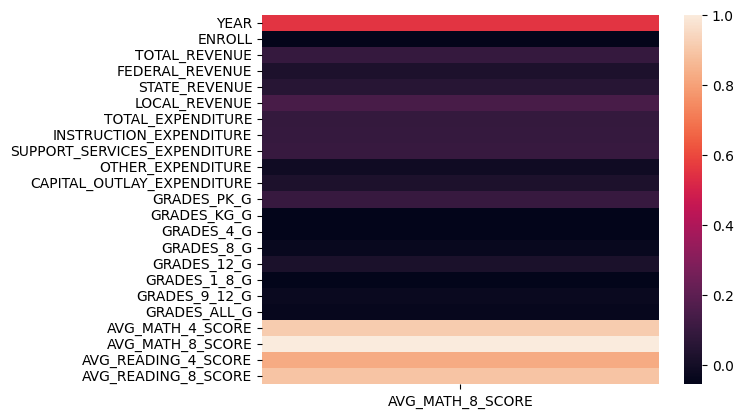

In [5]:
import seaborn as sns
sns.heatmap(edu_df.corr()[["AVG_MATH_8_SCORE"]])

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
#renaming from tutorial
edu_df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
edu_df.shape

(1715, 25)

In [7]:
edu_df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [8]:
#most values are null
edu_df.dropna(subset = "AVG_MATH_8_SCORE", inplace = True)

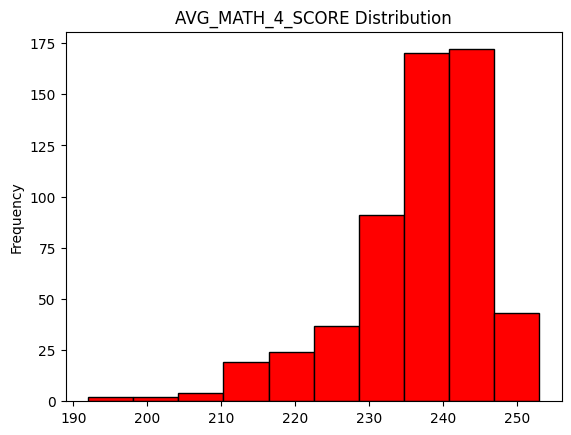

In [9]:
edu_df.AVG_MATH_4_SCORE.plot.hist(title = "AVG_MATH_4_SCORE Distribution", edgecolor = "black", color = "red")
edu_df.dropna(subset = "AVG_MATH_4_SCORE", inplace = True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [10]:
edu_df["YEAR"].unique()

array([1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 1990,
       1996, 2019])

In [11]:
how_many = len(edu_df["YEAR"].unique())
print(how_many)

13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [12]:
state_avg = edu_df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()
state_avg["MICHIGAN"] < state_avg["OHIO"]

True

In [13]:
state_avg["MICHIGAN"]

277.27272727272725

In [14]:
state_avg["OHIO"]

283.90909090909093

Find the average for your outcome score across all states in 2019

In [15]:
test_df = edu_df.set_index("YEAR")
test_df.tail()
test_df = test_df.loc[2019]
test_df.head()

,PRIMARY_KEY,STATE,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
2019,2019_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,230.0,269.0,212.0,253.0
2019,2019_ALASKA,ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,232.0,274.0,204.0,252.0
2019,2019_ARIZONA,ARIZONA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238.0,280.0,216.0,259.0
2019,2019_ARKANSAS,ARKANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,233.0,274.0,215.0,259.0
2019,2019_CALIFORNIA,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,276.0,216.0,259.0


In [16]:
test_df_avg = test_df["AVG_MATH_8_SCORE"].mean()
test_df_avg

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [17]:
edu_df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [18]:
#instruction expenditure proportional to total expenditure
edu_df[("instructional_expense_prop").upper()] = edu_df["INSTRUCTION_EXPENDITURE"] / edu_df["TOTAL_EXPENDITURE"]
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTIONAL_EXPENSE_PROP
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.558333
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.422130
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.553248
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.529091
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.503079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


<AxesSubplot: title={'center': 'Distribution of Proportional Instructional Expenses'}, ylabel='Frequency'>

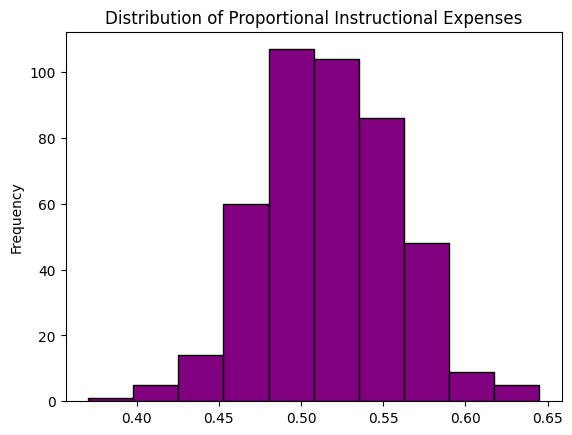

In [19]:
edu_df.INSTRUCTIONAL_EXPENSE_PROP.plot.hist(title = "Distribution of Proportional Instructional Expenses",
                                                     edgecolor = "black", color = "purple")

In [20]:
((edu_df["INSTRUCTIONAL_EXPENSE_PROP"].median() - edu_df["INSTRUCTIONAL_EXPENSE_PROP"])/edu_df["INSTRUCTIONAL_EXPENSE_PROP"]).describe()

count    439.000000
mean       0.003340
std        0.080161
min       -0.200390
25%       -0.054512
50%        0.000000
75%        0.054632
max        0.391448
Name: INSTRUCTIONAL_EXPENSE_PROP, dtype: float64

In [21]:
edu_df["INSTRUCTIONAL_EXPENSE_PROP"].fillna(edu_df["INSTRUCTIONAL_EXPENSE_PROP"].median(), inplace = True)
#edu_df.dropna(subset = str(i), inplace = True)

/tmp/ipykernel_31277/339106725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edu_df.corr()[["AVG_MATH_8_SCORE"]])


<AxesSubplot: >

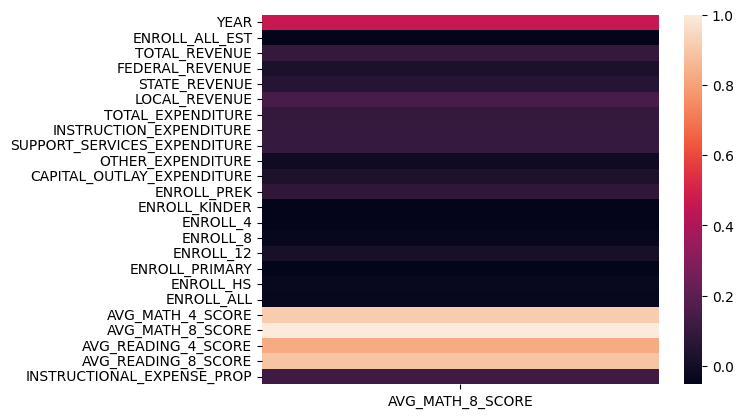

In [22]:
sns.heatmap(edu_df.corr()[["AVG_MATH_8_SCORE"]])

Feature engineering justification: I want to examine instruction expenditure, but I believe it will be more useful to contextualize raw expenditure proportionally. I created a new column that will examine instruction expenditure as a proportion of total expenditure. This will show how much of total state expenses are allocated towards education in the year shown in the table. I will use the new column in my predictive analysis for average math score in grade 8. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math Score (Grade 8)')

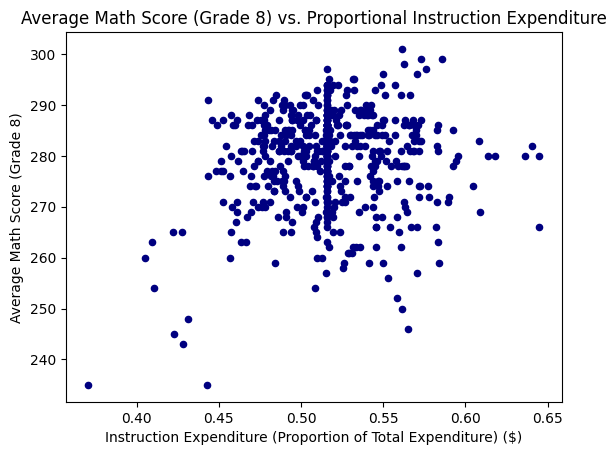

In [23]:
#predictors: instructional expenditure proportion (total expenditure), avg state math score grade 8
edu_df.plot.scatter(x = "INSTRUCTIONAL_EXPENSE_PROP", y = "AVG_MATH_8_SCORE", title = "Average Math Score (Grade 8) vs. " 
                    "Proportional Instruction Expenditure", color = "navy")
plt.xlabel("Instruction Expenditure (Proportion of Total Expenditure) ($)")
plt.ylabel("Average Math Score (Grade 8)")

Scatterplot showing the relationship between instruction expenditure as a proportion of total expenditure and average math score in grade 8. As an estimate, there is a moderate, positive correlation between the predictor and the outcome. 

**Visualization 2**

Text(0, 0.5, 'Average Math Score (Grade 8)')

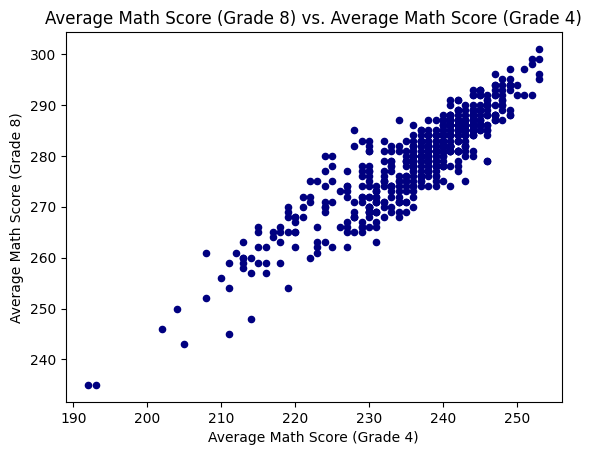

In [24]:
#predictors: instructional expenditure proportion (total enrollment), avg state math score grade 8
edu_df.plot.scatter(x = "AVG_MATH_4_SCORE", y = "AVG_MATH_8_SCORE", title = "Average Math Score (Grade 8) vs. " 
                    "Average Math Score (Grade 4)", color = "navy")
plt.xlabel("Average Math Score (Grade 4)")
plt.ylabel("Average Math Score (Grade 8)")

Scatterplot showing the relationship between instruction expenditure per student and average math score in grade 8. As an estimate, there is a moderate-to-strong, positive correlation between the predictor and the outcome. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = edu_df[["INSTRUCTIONAL_EXPENSE_PROP", "AVG_MATH_4_SCORE"]].dropna()
y = edu_df.loc[X.index]["AVG_MATH_8_SCORE"]

In [27]:
y.shape

(564,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [29]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [30]:
# create your model here
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [40]:
model.score(X_test, y_test)

0.8759845658543507

In [41]:
model.intercept_

56.22286075883227

In [42]:
model.coef_

array([16.08897212,  0.90877049])

In [43]:
np.mean(np.abs(model.predict(X_test)-y_test))

2.929533930722645

In [44]:
np.mean(model.predict(X_test)-y_test)

0.011889319639696878

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

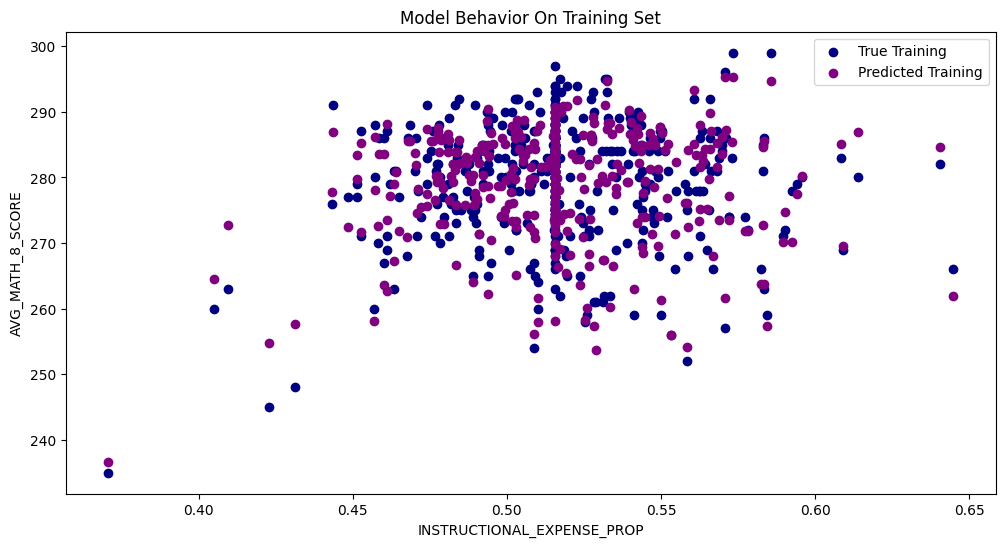

In [45]:
f = plt.figure(figsize=(12,6))
col_name = "INSTRUCTIONAL_EXPENSE_PROP"
plt.scatter(X_train[col_name], y_train, color = "navy")
plt.scatter(X_train[col_name], model.predict(X_train), color = "purple")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

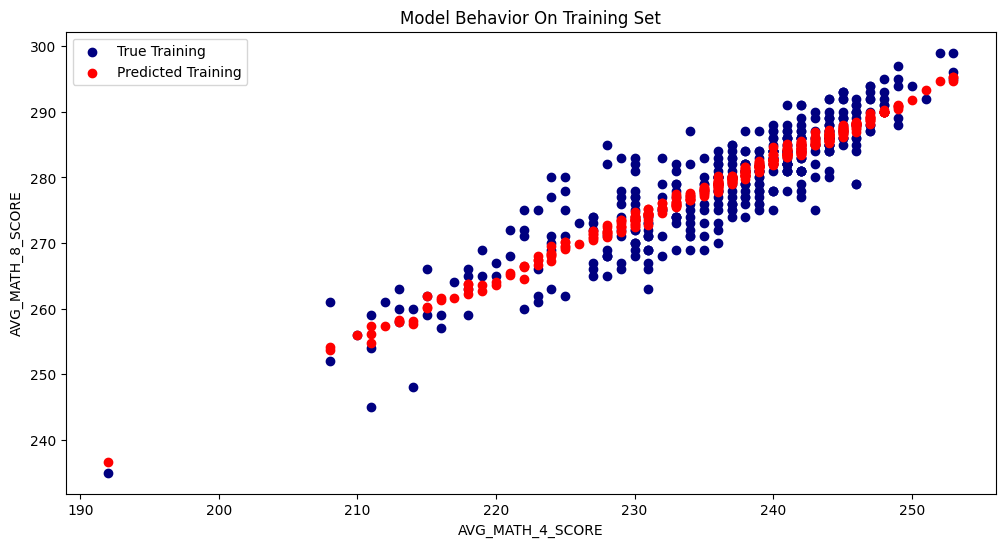

In [46]:
f = plt.figure(figsize=(12,6))
col_name ="AVG_MATH_4_SCORE"
plt.scatter(X_train[col_name], y_train, color = "navy")
plt.scatter(X_train[col_name], model.predict(X_train), color = "red")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

In this checkpoint, I predicted Average Math Score in Grade 8 using Average Math Score in Grade 4 and Instructional Expenditure as a proportion of Total Expenditure (Proportional Instruction Expenditure). The second predictor is a variable I created using the two relevant columns in the dataset. I used linear regression for my machine learning model because Average Math Score in Grade 8 is numerical and continuous. The R^2 value is approximately 0.876, and the absolute mean error is around 2.93, both of which suggest the model is reasonably accurate in prediction. The above scatterplots show actual and predicted data for each predictor variable. Both scatterplots display a similar conclusion about the reasonable accuracy of the model, as both sets of predictions are reasonably similar to their respective actual data in correlation and value. There is a moderate positive relationship between Proportional Instruction Expenditure and Average Math Score in Grade 8, and a strong positive relationship between Average Math Score in Grade 4 and Average Math Score in Grade 8.  